In [94]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

In [96]:
df=pd.read_csv('D:/datasets+minipro/analytics vidhya datasets/janatahack p4 ola uber/train.csv')

In [97]:
df.isnull().sum()

Trip_ID                            0
Trip_Distance                      0
Type_of_Cab                    20210
Customer_Since_Months           5920
Life_Style_Index               20193
Confidence_Life_Style_Index    20193
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var1                           71030
Var2                               0
Var3                               0
Gender                             0
Surge_Pricing_Type                 0
dtype: int64

In [98]:
df.shape

(131662, 14)

In [179]:
# percentage of null values in data:
(df.isnull().sum()/len(df))*100

Trip_ID                         0.000000
Trip_Distance                   0.000000
Type_of_Cab                    15.349911
Customer_Since_Months           4.496362
Life_Style_Index               15.336999
Confidence_Life_Style_Index    15.336999
Destination_Type                0.000000
Customer_Rating                 0.000000
Cancellation_Last_1Month        0.000000
Var1                           53.948748
Var2                            0.000000
Var3                            0.000000
Gender                          0.000000
Surge_Pricing_Type              0.000000
dtype: float64

## Before Imputation visualizations:

In [ ]:
plt.style.use('seaborn-darkgrid')

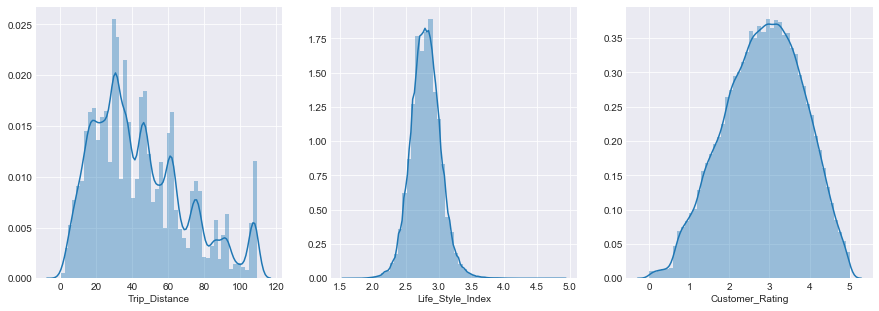

In [174]:
fig,axes=plt.subplots(1,3,figsize=(15,5))
sns.distplot(df['Trip_Distance'],ax=axes[0])
sns.distplot(df['Life_Style_Index'].dropna(),ax=axes[1])
sns.distplot(df['Customer_Rating'].dropna(),ax=axes[2])
plt.show()

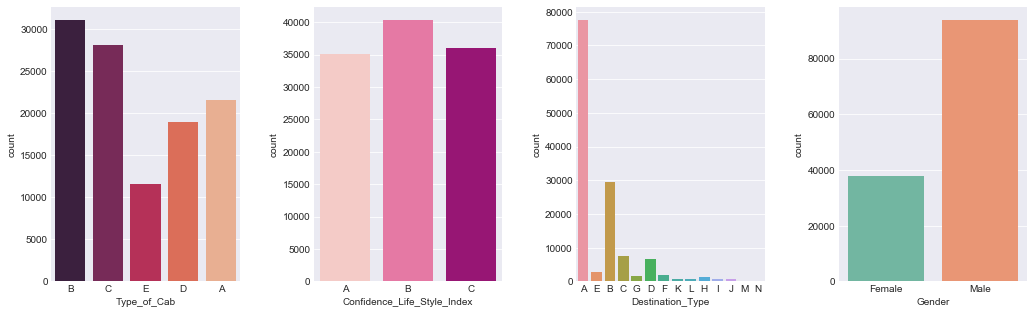

In [207]:
fig,axes=plt.subplots(1,4,figsize=(15,5))
sns.countplot(df['Type_of_Cab'],ax=axes[0], palette="rocket")
sns.countplot(df['Confidence_Life_Style_Index'],ax=axes[1], palette="RdPu")
sns.countplot(df['Destination_Type'],ax=axes[2])
sns.countplot(df['Gender'],ax=axes[3], palette="Set2")
plt.tight_layout(pad=3)
plt.show()
# palette=rocket,pastel,deep,Set3,RdPu,RdBu,Set2


In [183]:
# sns.countplot(df['Destination_Type'],hue=df['Gender'])
# plt.show()
a=pd.crosstab(df['Destination_Type'],df['Gender'])
b=pd.crosstab(df['Cancellation_Last_1Month'],df['Gender'])
c=pd.crosstab(df['Customer_Since_Months'],df['Gender'])

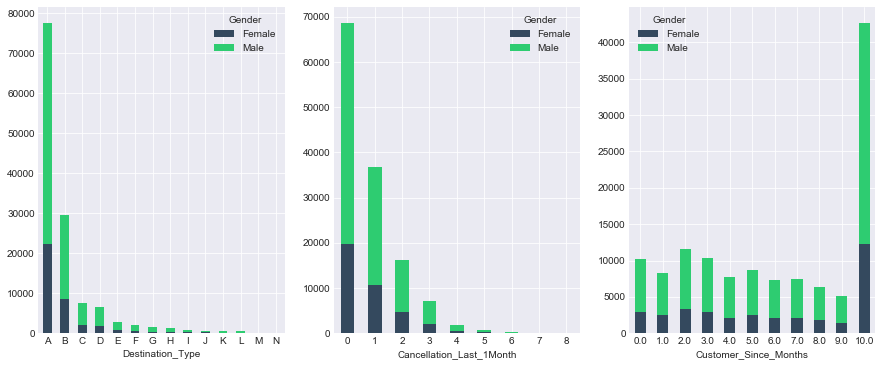

In [187]:
fig,axes=plt.subplots(1,3,figsize=(15,6))
a.plot(kind='bar',rot=0,stacked=True,ax=axes[0],color=["#34495e","#2ecc71"])
b.plot(kind='bar',rot=0,stacked=True,ax=axes[1],color=["#34495e","#2ecc71"])
c.plot(kind='bar',rot=0,stacked=True,ax=axes[2],color=["#34495e","#2ecc71"])
plt.show()
# color_map = ["#9b59b6", "#e74c3c", "#34495e", "#2ecc71"]
# Customer_Since_Months	Customer using cab services since n months; 0 month means current month
# Cancellation_Last_1Month	Number of trips cancelled by the customer in last 1 month

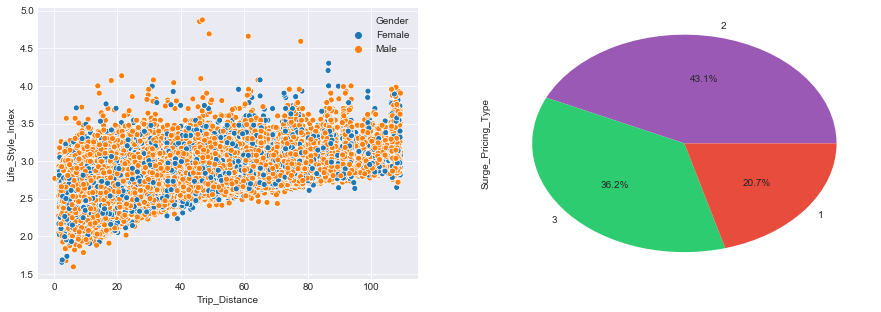

In [171]:
fig,axes=plt.subplots(1,2,figsize=(15,5))
sns.scatterplot(df['Trip_Distance'],df['Life_Style_Index'],hue=df['Gender'],ax=axes[0])
df['Surge_Pricing_Type'].value_counts().plot(kind='pie',autopct='%1.1f%%',ax=axes[1],colors=["#9b59b6","#2ecc71",'#e74c3c'])
plt.show()
# sns.scatterplot(df['Life_Style_Index'],df['Customer_Rating'],ax=axes[1])
# sns.scatterplot(df['Trip_Distance'],df['Customer_Rating'],hue=df['Gender'],ax=axes[2])
plt.show()

## After imputations:

In [189]:
df1=df.copy()

In [194]:
# df1.drop('Trip_ID',1,inplace=True)
from sklearn.impute import SimpleImputer
si=SimpleImputer(missing_values=np.nan, strategy='median')
sicate=SimpleImputer(missing_values=np.nan, strategy='most_frequent')
for i in df1.select_dtypes(include='object'):
    if df1[i].isnull().sum()>0:
        df1[i]=sicate.fit_transform(np.array(df1[i]).reshape(-1,1))
for i in df1.select_dtypes(exclude='object'):
    if df1[i].isnull().sum()>0:
        df1[i]=si.fit_transform(np.array(df1[i]).reshape(-1,1))

In [195]:
(df1.isnull().sum()/len(df1))*100

Trip_Distance                  0.0
Type_of_Cab                    0.0
Customer_Since_Months          0.0
Life_Style_Index               0.0
Confidence_Life_Style_Index    0.0
Destination_Type               0.0
Customer_Rating                0.0
Cancellation_Last_1Month       0.0
Var1                           0.0
Var2                           0.0
Var3                           0.0
Gender                         0.0
Surge_Pricing_Type             0.0
dtype: float64

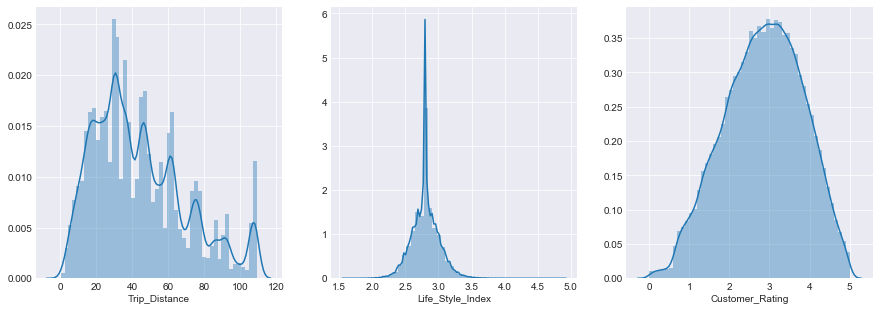

In [205]:
fig,axes=plt.subplots(1,3,figsize=(15,5))
sns.distplot(df1['Trip_Distance'],ax=axes[0])
sns.distplot(df1['Life_Style_Index'].dropna(),ax=axes[1])
sns.distplot(df1['Customer_Rating'].dropna(),ax=axes[2])
plt.show()

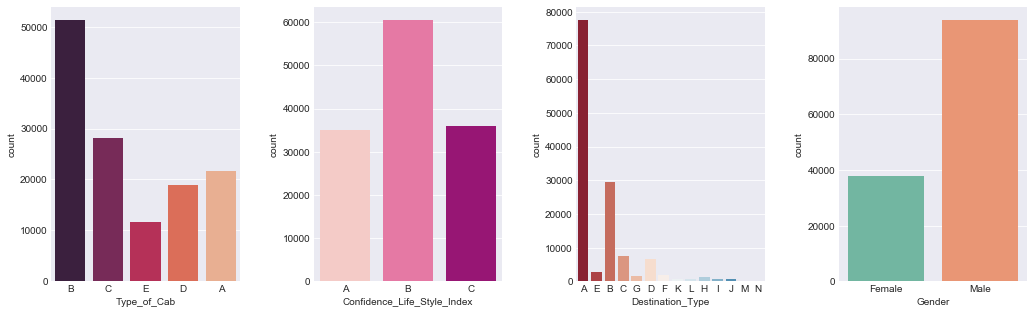

In [197]:
fig,axes=plt.subplots(1,4,figsize=(15,5))
sns.countplot(df1['Type_of_Cab'],ax=axes[0], palette="rocket")
sns.countplot(df1['Confidence_Life_Style_Index'],ax=axes[1], palette="RdPu")
sns.countplot(df1['Destination_Type'],ax=axes[2], palette="RdBu")
sns.countplot(df1['Gender'],ax=axes[3], palette="Set2")
plt.tight_layout(pad=3)
plt.show()

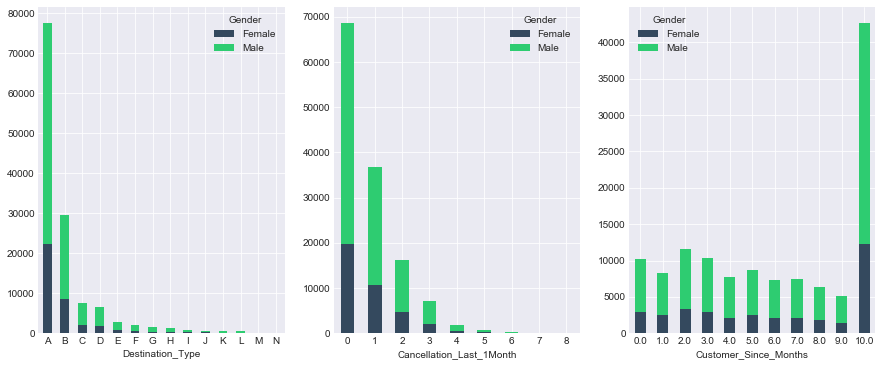

In [198]:
fig,axes=plt.subplots(1,3,figsize=(15,6))
a.plot(kind='bar',rot=0,stacked=True,ax=axes[0],color=["#34495e","#2ecc71"])
b.plot(kind='bar',rot=0,stacked=True,ax=axes[1],color=["#34495e","#2ecc71"])
c.plot(kind='bar',rot=0,stacked=True,ax=axes[2],color=["#34495e","#2ecc71"])
plt.show()

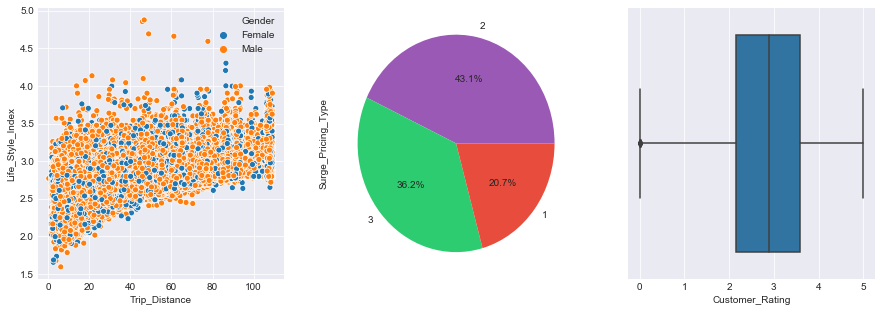

In [204]:
fig,axes=plt.subplots(1,3,figsize=(15,5))
sns.scatterplot(df1['Trip_Distance'],df1['Life_Style_Index'],hue=df1['Gender'],ax=axes[0])
df1['Surge_Pricing_Type'].value_counts().plot(kind='pie',autopct='%1.1f%%',ax=axes[1],colors=["#9b59b6","#2ecc71",'#e74c3c'])
sns.boxplot(df1['Customer_Rating'],ax=axes[2])
plt.show()